In [125]:
import pandas as pd
import numpy as np
from numpy import absolute
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score,r2_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from yellowbrick.regressor import PredictionError

In [126]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [127]:
df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  201220752  09/16/2020 12:00:00 AM  09/16/2020 12:00:00 AM      1230    12   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2  77th Street         1259         2     745   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  Status Desc  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO  Adult Other   
1                           BATTERY - SIMPLE ASSAULT  ...     IC  Invest Cont   
2           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC  Invest Cont   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC  Invest Cont   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC  Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    624.0      NaN       NaN      NaN   
1    624.0      NaN       NaN      NaN   
2    745.0      NaN       NaN      NaN   
3    745.0    998.0       NaN      NaN   
4    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    700 E  73RD                         ST          NaN  33.9739 -118.2630  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [128]:
df.describe().T

count          mean           std       min           25%  \
DR_NO           317854.0  2.050625e+08  4.965168e+06  817.0000  2.009132e+08   
TIME OCC        317854.0  1.352763e+03  6.500014e+02    1.0000  9.200000e+02   
AREA            317854.0  1.079886e+01  6.039124e+00    1.0000  6.000000e+00   
Rpt Dist No     317854.0  1.126046e+03  6.040058e+02  101.0000  6.280000e+02   
Part 1-2        317854.0  1.412765e+00  4.923320e-01    1.0000  1.000000e+00   
Crm Cd          317854.0  5.089288e+02  2.103386e+02  110.0000  3.300000e+02   
Vict Age        317854.0  3.007335e+01  2.171658e+01   -1.0000  1.200000e+01   
Premis Cd       317849.0  2.944511e+02  2.129494e+02  101.0000  1.010000e+02   
Weapon Used Cd  116477.0  3.625238e+02  1.231582e+02  101.0000  3.080000e+02   
Crm Cd 1        317851.0  5.086576e+02  2.101257e+02  110.0000  3.300000e+02   
Crm Cd 2         25981.0  9.554274e+02  1.160663e+02  210.0000  9.980000e+02   
Crm Cd 3           880.0  9.823761e+02  5.363315e+01  626.0000  9.980000e+02   
Crm Cd 4            30.0  9.898667e+02  3.422515e+01  821.0000  9.980000e+02   
LAT             317854.0  3.382510e+01  2.893775e+00    0.0000  3.400780e+01   
LON             317854.0 -1.174956e+02  1.004482e+01 -118.6676 -1.184296e+02   

                         50%           75%           max  
DR_NO           2.018096e+08  2.108086e+08  2.199178e+08  
TIME OCC        1.430000e+03  1.900000e+03  2.359000e+03  
AREA            1.100000e+01  1.600000e+01  2.100000e+01  
Rpt Dist No     1.149000e+03  1.621000e+03  2.199000e+03  
Part 1-2        1.000000e+00  2.000000e+00  2.000000e+00  
Crm Cd          5.100000e+02  6.260000e+02  9.560000e+02  
Vict Age        3.100000e+01  4.500000e+01  1.200000e+02  
Premis Cd       2.030000e+02  5.010000e+02  9.710000e+02  
Weapon Used Cd  4.000000e+02  4.000000e+02  5.160000e+02  
Crm Cd 1        5.100000e+02  6.260000e+02  9.560000e+02  
Crm Cd 2        9.980000e+02  9.980000e+02  9.990000e+02  
Crm Cd 3        9.980000e+02  9.980000e+02  9.990000e+02  
Crm Cd 4        9.980000e+02  9.980000e+02  9.990000e+02  
LAT             3.405740e+01  3.416290e+01  3.433430e+01  
LON            -1.183213e+02 -1.182740e+02  0.000000e+00

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317854 entries, 0 to 317853
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           317854 non-null  int64  
 1   Date Rptd       317854 non-null  object 
 2   DATE OCC        317854 non-null  object 
 3   TIME OCC        317854 non-null  int64  
 4   AREA            317854 non-null  int64  
 5   AREA NAME       317854 non-null  object 
 6   Rpt Dist No     317854 non-null  int64  
 7   Part 1-2        317854 non-null  int64  
 8   Crm Cd          317854 non-null  int64  
 9   Crm Cd Desc     317854 non-null  object 
 10  Mocodes         274531 non-null  object 
 11  Vict Age        317854 non-null  int64  
 12  Vict Sex        276448 non-null  object 
 13  Vict Descent    276443 non-null  object 
 14  Premis Cd       317849 non-null  float64
 15  Premis Desc     317746 non-null  object 
 16  Weapon Used Cd  116477 non-null  float64
 17  Weapon Des

In [130]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            43323
Vict Age               0
Vict Sex           41406
Vict Descent       41411
Premis Cd              5
Premis Desc          108
Weapon Used Cd    201377
Weapon Desc       201377
Status                 0
Status Desc            0
Crm Cd 1               3
Crm Cd 2          291873
Crm Cd 3          316974
Crm Cd 4          317824
LOCATION               0
Cross Street      260877
LAT                    0
LON                    0
dtype: int64

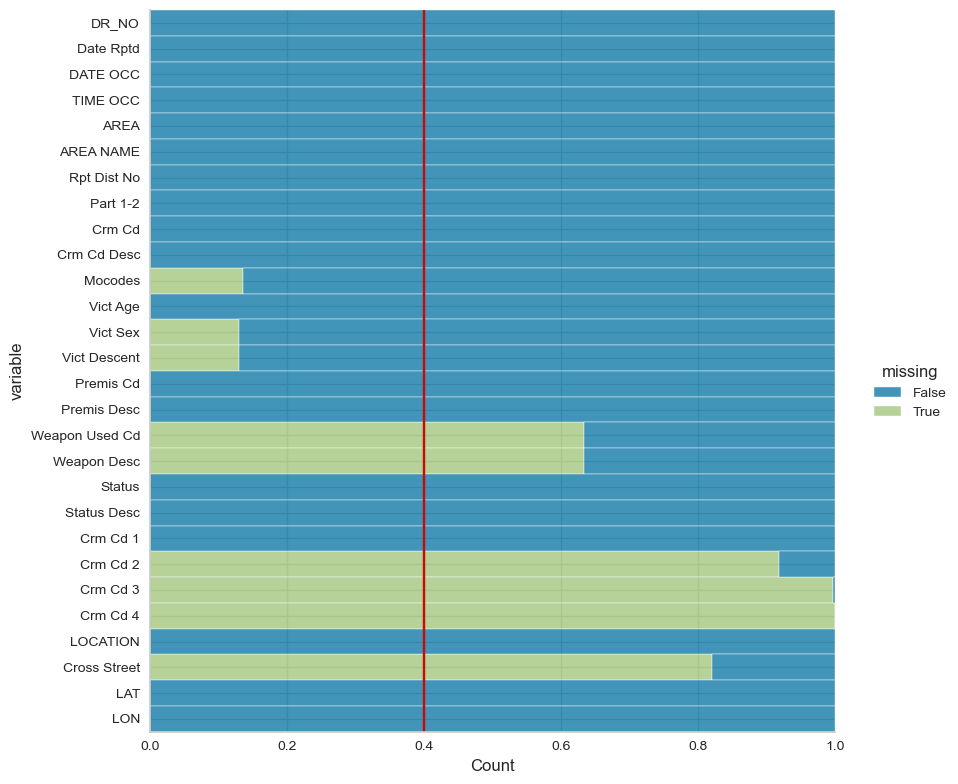

In [131]:
sns.displot(data=df.isnull().melt(value_name='missing'), y='variable', hue='missing', multiple='fill', height=8, aspect=1.1)
# specifying a threshold value
plt.axvline(0.4, color='r')

In [132]:
df.nunique()

DR_NO             317854
Date Rptd            594
DATE OCC             594
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1172
Part 1-2               2
Crm Cd               133
Crm Cd Desc          133
Mocodes           123912
Vict Age             101
Vict Sex               4
Vict Descent          19
Premis Cd            304
Premis Desc          302
Weapon Used Cd        78
Weapon Desc           78
Status                 5
Status Desc            5
Crm Cd 1             135
Crm Cd 2             108
Crm Cd 3              27
Crm Cd 4               4
LOCATION           49731
Cross Street        6908
LAT                 5183
LON                 4864
dtype: int64

<Axes: title={'center': 'Unique elements count of attributes'}, xlabel='Attributes', ylabel='Unique count'>

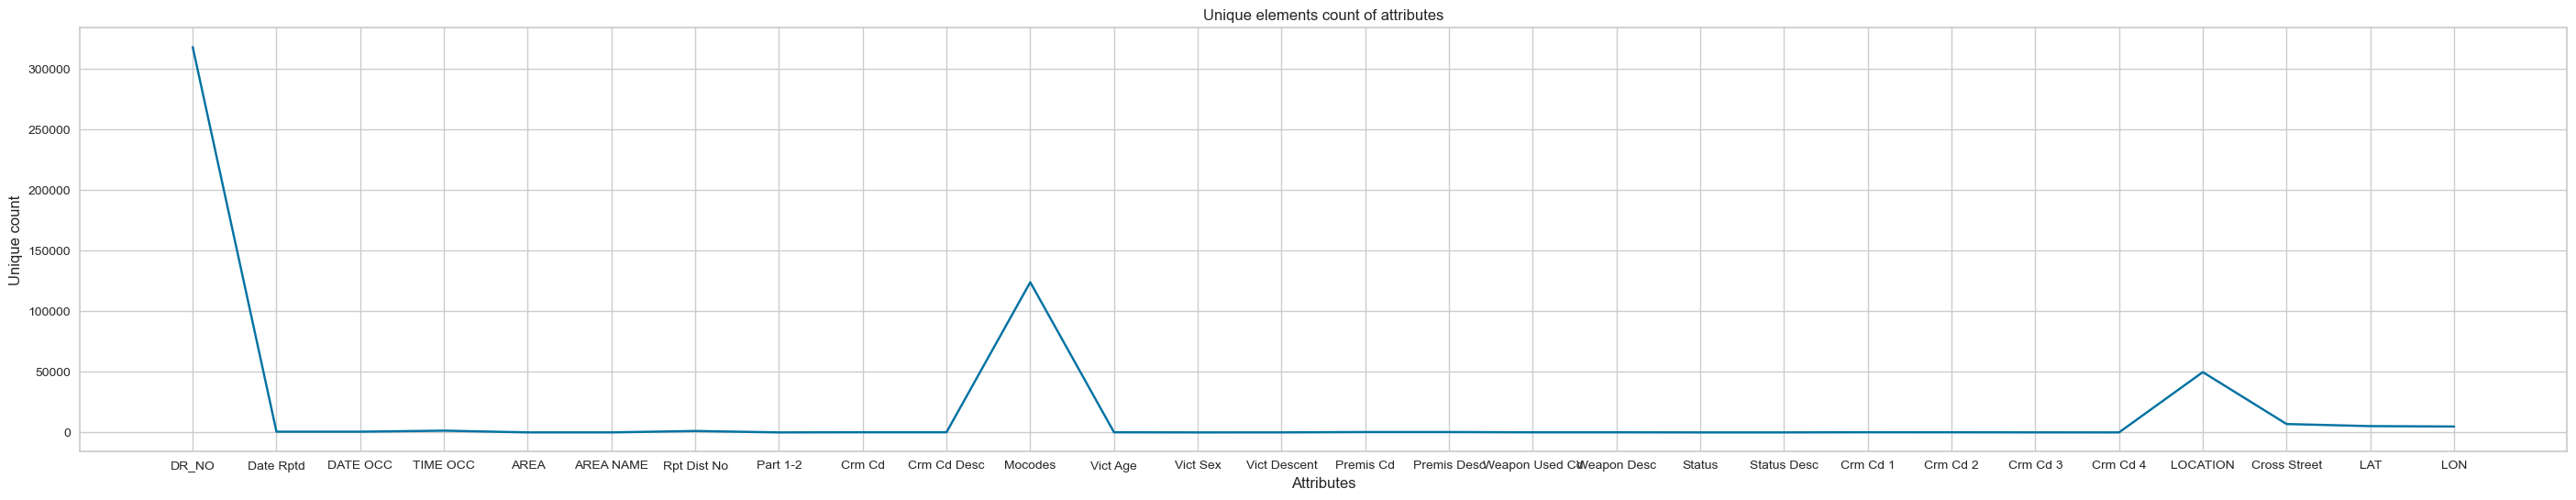

In [133]:
fig = plt.figure(figsize=(35,6))
plt.title('Unique elements count of attributes')
plt.xlabel('Attributes')
plt.ylabel('Unique count')
sns.lineplot( x = df.columns, y = df.nunique())

In [134]:
#Droping empty or trivial columns
df = df.drop(['Cross Street','Crm Cd 4','Crm Cd 3','Crm Cd 2','Weapon Desc','Weapon Used Cd','Vict Descent','Vict Sex','Mocodes'],axis=1)

# Handling null numeric attribute values

In [135]:
df.select_dtypes(exclude='object').isnull().sum()

DR_NO          0
TIME OCC       0
AREA           0
Rpt Dist No    0
Part 1-2       0
Crm Cd         0
Vict Age       0
Premis Cd      5
Crm Cd 1       3
LAT            0
LON            0
dtype: int64

In [136]:
median_value = df['Crm Cd 1'].median()
df['Crm Cd 1'] = df['Crm Cd 1'].fillna(median_value)

# Handling blanks of object attributes by replacing with Most Probable Values

In [137]:
df.select_dtypes(include='object').isnull().sum()

Date Rptd        0
DATE OCC         0
AREA NAME        0
Crm Cd Desc      0
Premis Desc    108
Status           0
Status Desc      0
LOCATION         0
dtype: int64

In [138]:
cleaner = SimpleImputer(strategy='most_frequent')

value = df['Premis Desc'].values.reshape(-1, 1)
df['Premis Desc'] = cleaner.fit_transform(value)

value = df['Premis Cd'].values.reshape(-1, 1)
df['Premis Cd'] = cleaner.fit_transform(value)

In [139]:
df.isnull().sum()

DR_NO          0
Date Rptd      0
DATE OCC       0
TIME OCC       0
AREA           0
AREA NAME      0
Rpt Dist No    0
Part 1-2       0
Crm Cd         0
Crm Cd Desc    0
Vict Age       0
Premis Cd      0
Premis Desc    0
Status         0
Status Desc    0
Crm Cd 1       0
LOCATION       0
LAT            0
LON            0
dtype: int64

In [140]:
# Transforming date columns to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Encoding Categorical Variables


In [141]:
df.select_dtypes(include='object')

AREA NAME                                        Crm Cd Desc  \
0         Southwest                           BATTERY - SIMPLE ASSAULT   
1           Central                           BATTERY - SIMPLE ASSAULT   
2       77th Street           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
3       N Hollywood           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
4           Mission  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
...             ...                                                ...   
317849  77th Street                                   VEHICLE - STOLEN   
317850       Harbor                                 FALSE IMPRISONMENT   
317851   Devonshire                           BATTERY - SIMPLE ASSAULT   
317852    Southwest                                      THEFT, PERSON   
317853      Olympic                                   VEHICLE - STOLEN   

                                         Premis Desc Status   Status Desc  \
0                             SINGLE FAMILY DWELLING     AO   Adult Other   
1                                           SIDEWALK     IC   Invest Cont   
2       MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     IC   Invest Cont   
3       MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     IC   Invest Cont   
4                                BEAUTY SUPPLY STORE     IC   Invest Cont   
...                                              ...    ...           ...   
317849                                   PARKING LOT     IC   Invest Cont   
317850  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     AA  Adult Arrest   
317851                        SINGLE FAMILY DWELLING     IC   Invest Cont   
317852                                        STREET     IC   Invest Cont   
317853                                        STREET     IC   Invest Cont   

                                        LOCATION  
0        1100 W  39TH                         PL  
1         700 S  HILL                         ST  
2         700 E  73RD                         ST  
3        5400    CORTEEN                      PL  
4       14400    TITUS                        ST  
...                                          ...  
317849           58TH                         ST  
317850    200 W  2ND                          ST  
317851   8800    DEMPSEY                      AV  
317852           CRENSHAW                     BL  
317853   3300 W  8TH                          ST  

[317854 rows x 6 columns]

In [142]:
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].nunique())

AREA NAME 21
Crm Cd Desc 133
Premis Desc 302
Status 5
Status Desc 5
LOCATION 49731


In [143]:
df['AREA NAME'].unique()

array(['Southwest', 'Central', '77th Street', 'N Hollywood', 'Mission',
       'Southeast', 'Devonshire', 'Harbor', 'West Valley', 'West LA',
       'Pacific', 'Wilshire', 'Hollywood', 'Northeast', 'Hollenbeck',
       'Olympic', 'Newton', 'Topanga', 'Van Nuys', 'Foothill', 'Rampart'],
      dtype=object)

In [144]:
le = LabelEncoder()
df['AREA NAME'] = le.fit_transform(df['AREA NAME'])
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Premis Cd', 'Premis Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'LOCATION', 'LAT', 'LON'],
      dtype='object')

## Transforming 'Crm Cd Desc' column to CrimeType column

In [145]:
df['Crm Cd Desc']

0                                  BATTERY - SIMPLE ASSAULT
1                                  BATTERY - SIMPLE ASSAULT
2                  VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3                  VANDALISM - MISDEAMEANOR ($399 OR UNDER)
4         VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
                                ...                        
317849                                     VEHICLE - STOLEN
317850                                   FALSE IMPRISONMENT
317851                             BATTERY - SIMPLE ASSAULT
317852                                        THEFT, PERSON
317853                                     VEHICLE - STOLEN
Name: Crm Cd Desc, Length: 317854, dtype: object

In [146]:
CrimeType = df['Crm Cd Desc'].apply(lambda x: x.split(' ')[0])
CrimeType

0           BATTERY
1           BATTERY
2         VANDALISM
3         VANDALISM
4         VANDALISM
            ...    
317849      VEHICLE
317850        FALSE
317851      BATTERY
317852       THEFT,
317853      VEHICLE
Name: Crm Cd Desc, Length: 317854, dtype: object

In [147]:
df.drop(columns=['Crm Cd Desc'], axis=1, inplace=True)
df.insert(5,'CrimeType',CrimeType)
df['CrimeType'] = le.fit_transform(df['CrimeType'])

## Transforming 'Premis Desc Column' column to CrimeSituation column

In [148]:
df['Premis Desc'].unique()

array(['SINGLE FAMILY DWELLING', 'SIDEWALK',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'BEAUTY SUPPLY STORE', 'NIGHT CLUB (OPEN EVENINGS ONLY)',
       'DEPARTMENT STORE', 'POLICE FACILITY', 'STREET', 'PARKING LOT',
       'HOTEL', "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)",
       'RESTAURANT/FAST FOOD', 'DAM/RESERVOIR', 'ALLEY', 'BUS STOP',
       'PUBLIC RESTROOM/OUTSIDE*', 'TRANSPORTATION FACILITY (AIRPORT)',
       'GARAGE/CARPORT', 'MTA BUS', 'MINI-MART', 'OTHER BUSINESS',
       'VEHICLE, PASSENGER/TRUCK', 'MARKET', 'OTHER STORE',
       'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)',
       'MTA - RED LINE - UNION STATION',
       'MTA - RED LINE - PERSHING SQUARE', 'DRUG STORE',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS",
       'PARKING UNDERGROUND/BUILDING', 'HOSPITAL',
       'LA UNION STATION (NOT LINE SPECIFIC)', 'MISSIONS/SHELTERS',
       'LIQUOR STORE', 'BAR/COCKTAIL/NIGHTCLUB',
       'DETENTION/JAIL FACILITY', 'OTHER PREMI

In [149]:
CrimeSituation = df['Premis Desc'].apply(lambda x: x.split(' ')[0])
CrimeSituation

0             SINGLE
1           SIDEWALK
2         MULTI-UNIT
3         MULTI-UNIT
4             BEAUTY
             ...    
317849       PARKING
317850    MULTI-UNIT
317851        SINGLE
317852        STREET
317853        STREET
Name: Premis Desc, Length: 317854, dtype: object

In [150]:
df.drop(columns=['Premis Desc'], axis=1, inplace=True)
df.insert(5,'CrimeSituation',CrimeSituation)
df['CrimeSituation'] = le.fit_transform(df['CrimeSituation'])

## Drop Status column

In [151]:
df['Status'].unique()

array(['AO', 'IC', 'AA', 'JA', 'JO'], dtype=object)

In [152]:
df.drop(columns=['Status'], axis=1, inplace=True)

## Encode 'Status Desc' Categorical Attribute

In [153]:
df['Status Desc'].unique()

array(['Adult Other', 'Invest Cont', 'Adult Arrest', 'Juv Arrest',
       'Juv Other'], dtype=object)

In [154]:
ohe = OneHotEncoder(sparse=False)
df['Status Desc'] = ohe.fit_transform(df['Status Desc'].values.reshape(-1, 1))

## Drop 'LOCATION' and 'DR_NO' Columns

In [155]:
df['LOCATION'].unique() 

array(['1100 W  39TH                         PL',
       '700 S  HILL                         ST',
       '700 E  73RD                         ST', ...,
       '3400    MARGUERITE                   ST',
       '1400 S  DE LA TORRE                  WY',
       '23100    FRIAR                        ST'], dtype=object)

In [156]:
df.drop(columns=['LOCATION'], axis=1, inplace=True)
df.drop(columns=['DR_NO'], axis=1, inplace=True)

In [157]:
df.head()

Date Rptd   DATE OCC  TIME OCC  AREA  CrimeSituation  CrimeType  AREA NAME  \
0 2020-01-08 2020-01-08      2230     3             150          3         15   
1 2020-01-02 2020-01-01       330     1             149          3          1   
2 2020-09-16 2020-09-16      1230    12             111         80          0   
3 2020-01-01 2020-01-01      1730    15             111         80          8   
4 2020-01-01 2020-01-01       415    19              19         80          7   

   Rpt Dist No  Part 1-2  Crm Cd  Vict Age  Premis Cd  Status Desc  Crm Cd 1  \
0          377         2     624        36      501.0          0.0     624.0   
1          163         2     624        25      102.0          0.0     624.0   
2         1259         2     745        62      502.0          0.0     745.0   
3         1543         2     745        76      502.0          0.0     745.0   
4         1998         2     740        31      409.0          0.0     740.0   

       LAT       LON  
0  34.0141 -118.2978  
1  34.0459 -118.2545  
2  33.9739 -118.2630  
3  34.1685 -118.4019  
4  34.2198 -118.4468

## Drop 'Date Rpt' and 'DATE OCC' Columns

In [160]:
# data = df.copy()
df.drop(columns=['Date Rptd','DATE OCC'],axis=1, inplace=True)
len(df.columns)

14

# Data Visualization

<Axes: xlabel='AREA', ylabel='Count'>

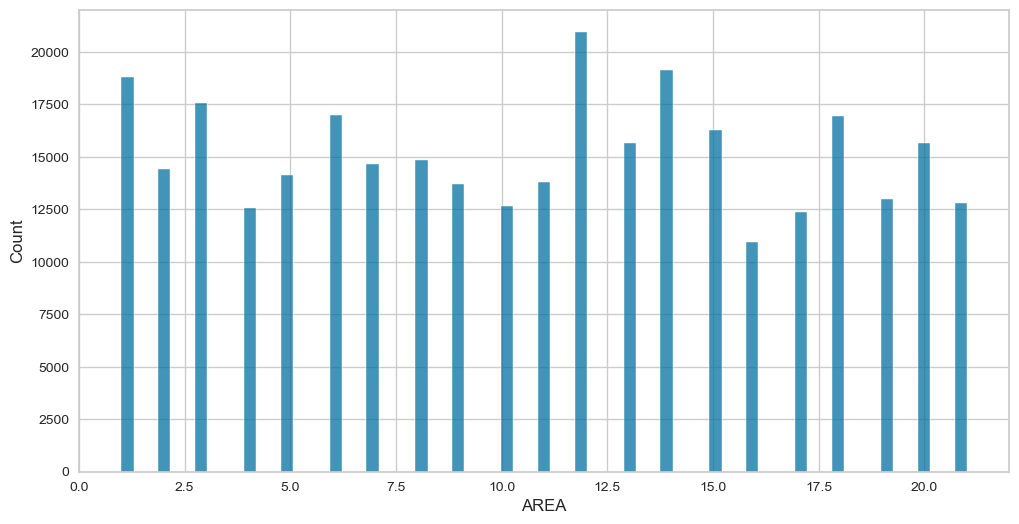

In [161]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(df['AREA'])

<Axes: xlabel='CrimeSituation', ylabel='Count'>

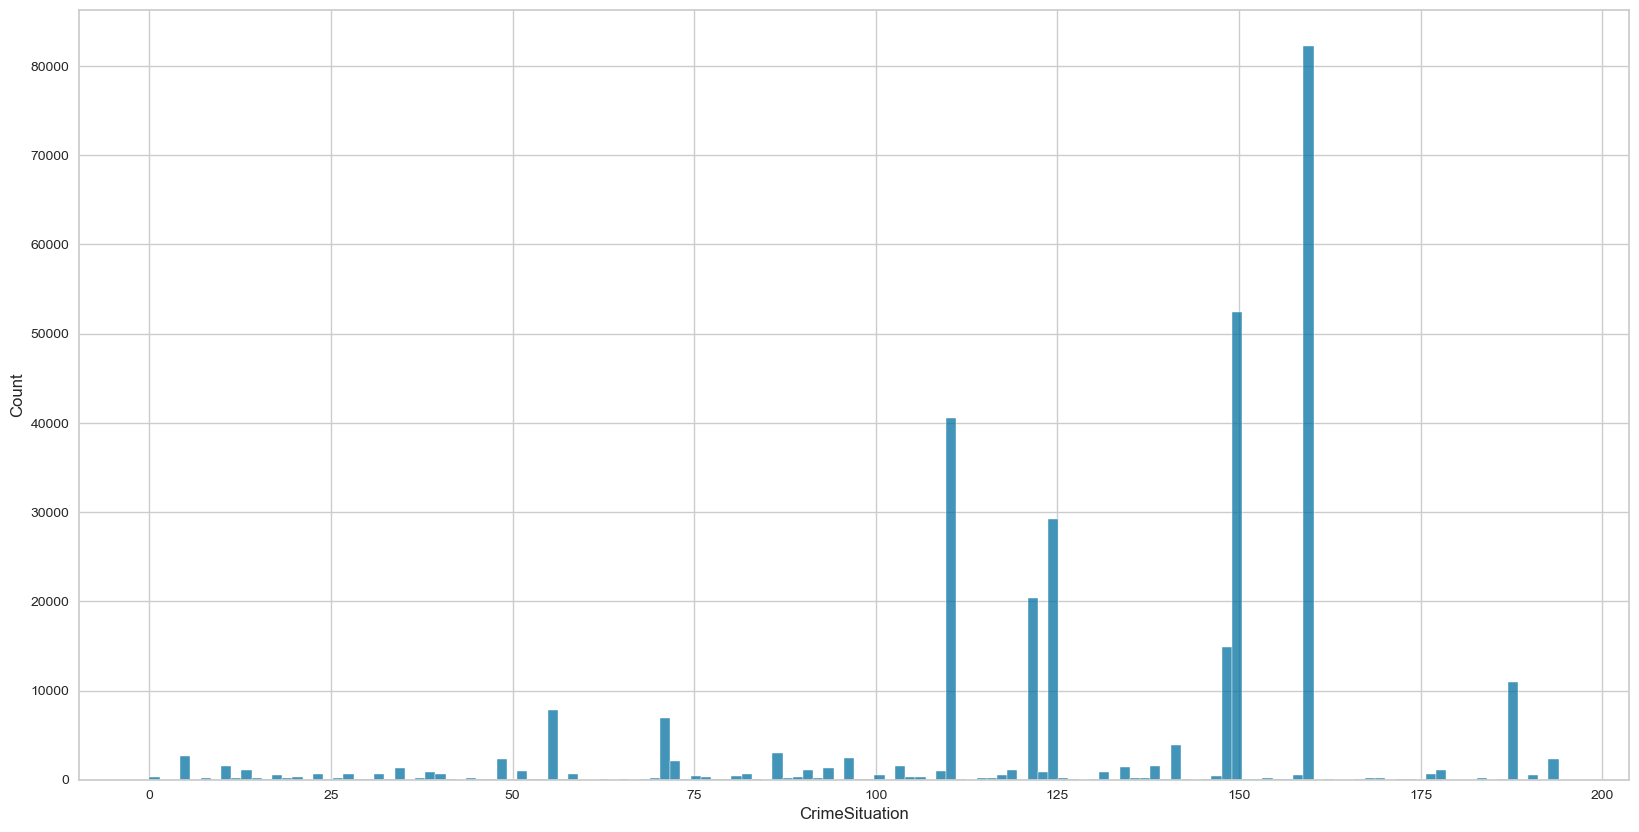

In [162]:
plt.figure(figsize=(20,10))
sns.histplot(df['CrimeSituation'])

<Axes: xlabel='AREA', ylabel='CrimeSituation'>

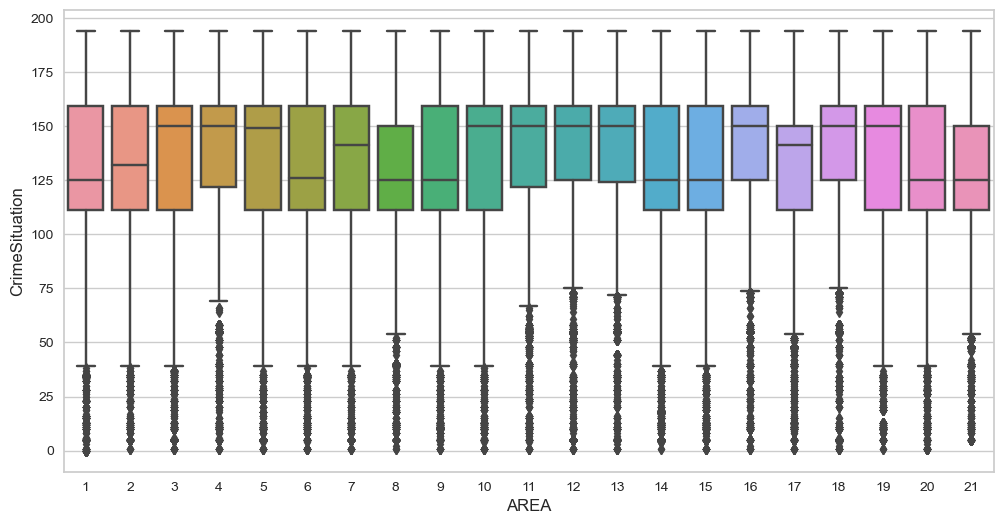

In [163]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= df['AREA'], y=df['CrimeSituation'])

<Axes: xlabel='AREA', ylabel='Vict Age'>

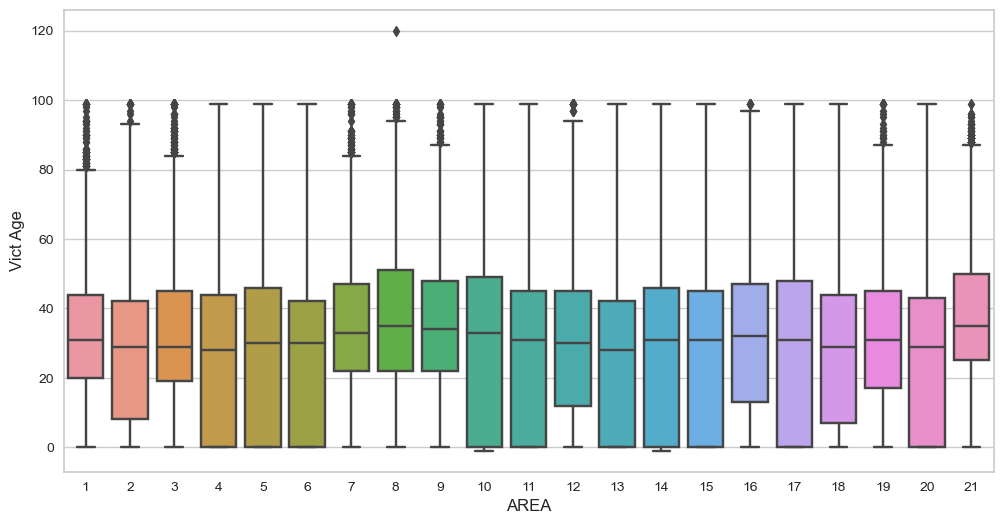

In [164]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= df['AREA'], y=df['Vict Age'])

<Axes: xlabel='AREA', ylabel='CrimeType'>

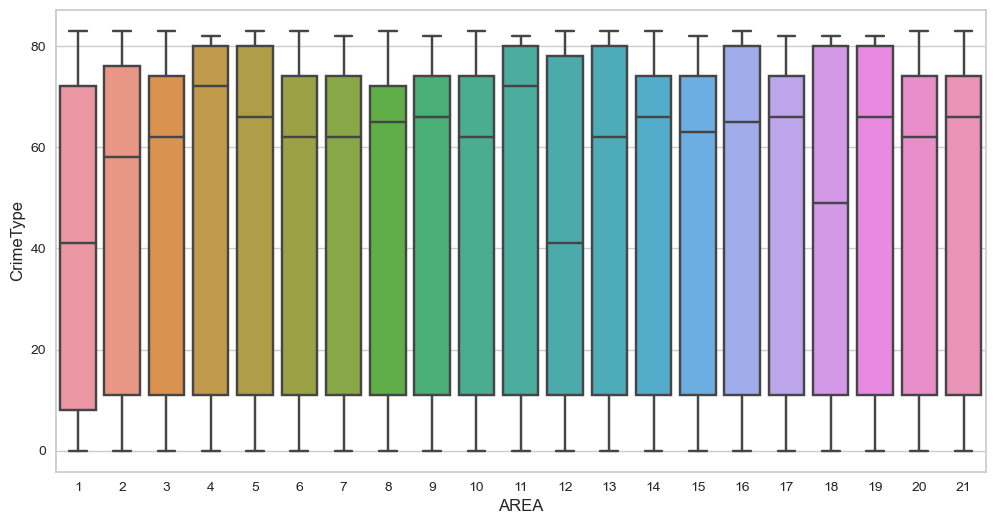

In [47]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= data['AREA'], y=data['CrimeType'])

<Axes: ylabel='AREA'>

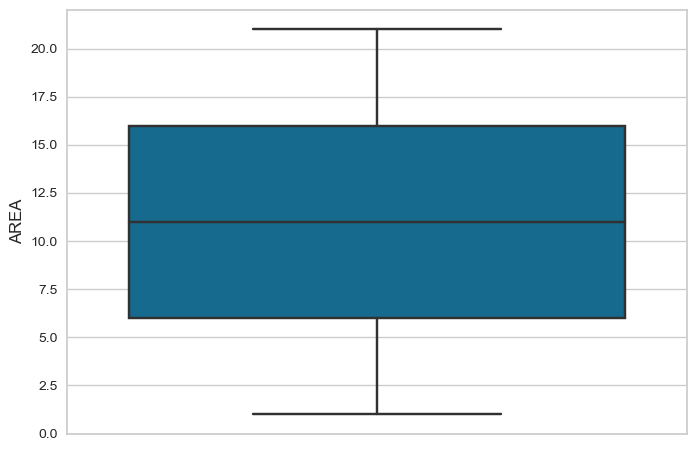

In [165]:
sns.boxplot(y = df['AREA'])

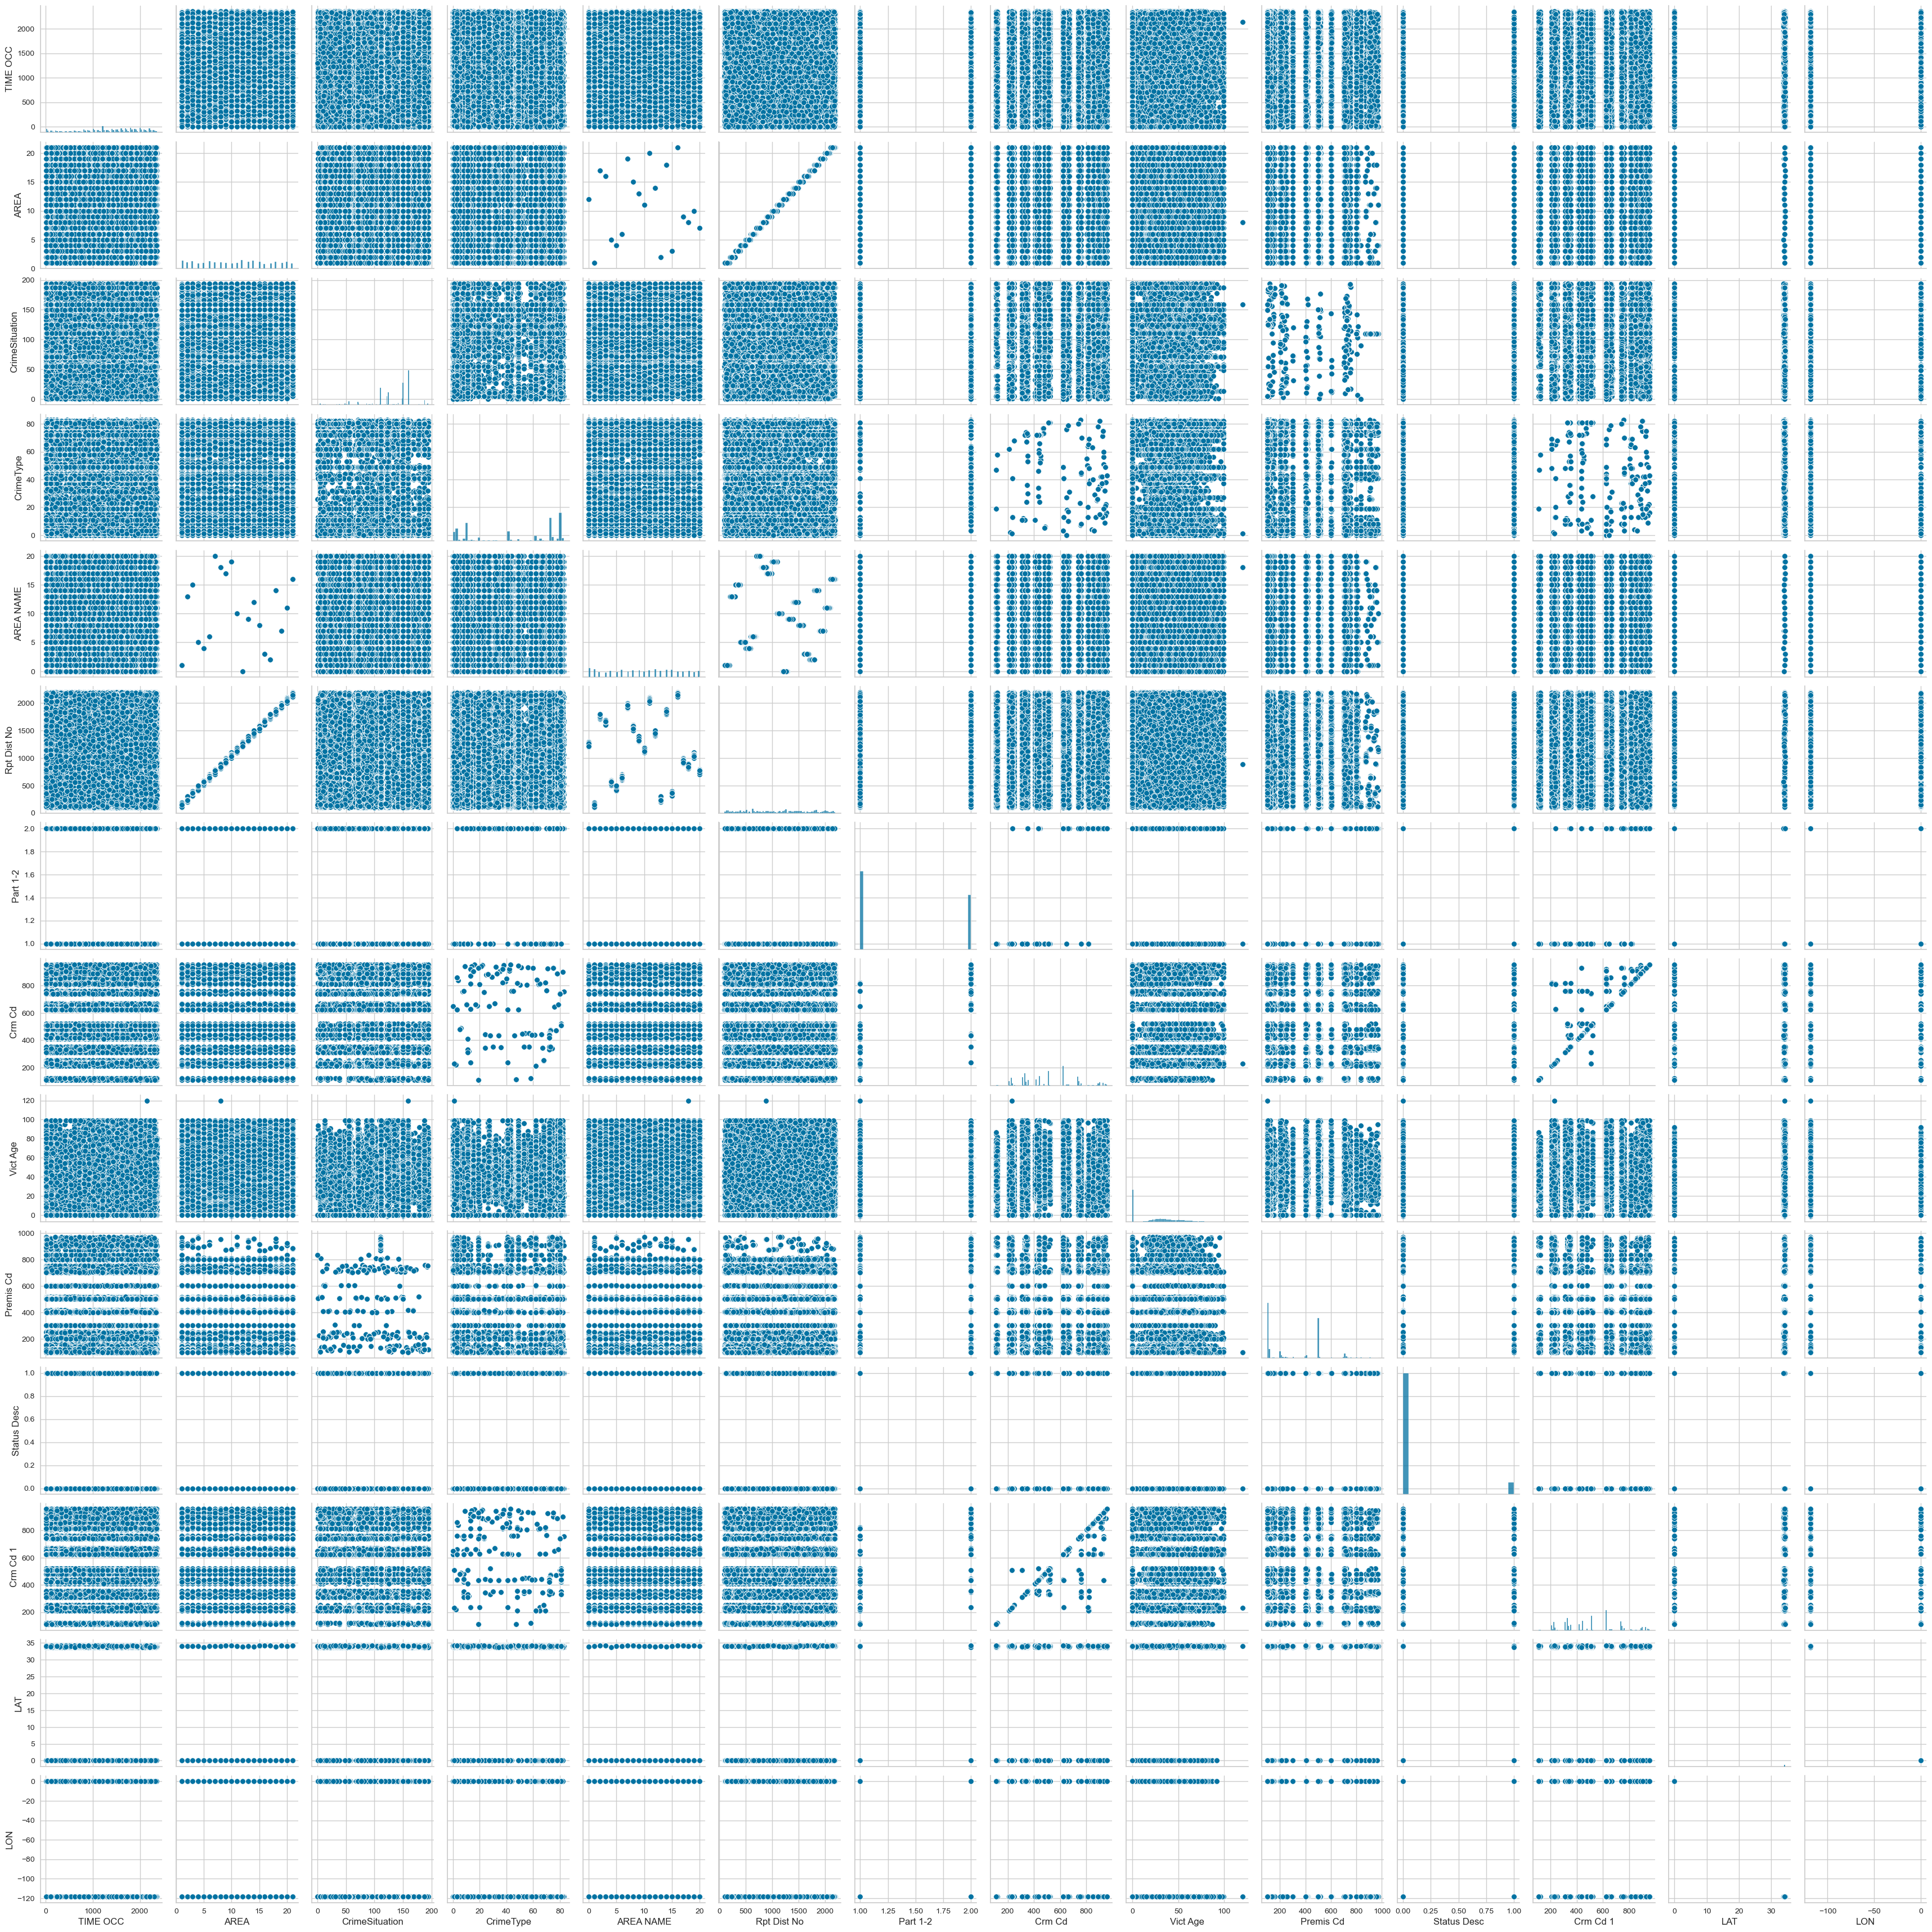

In [166]:
sns.pairplot(df)

# Split the data into training and testing sets

In [167]:
y = df.pop('Premis Cd')
y.shape

In [169]:
x = df
x.shape

(317854, 13)

# Correlation using mutual information

In [53]:
selector = SelectKBest(mutual_info_regression, k= 6)

In [54]:
y.isnull().sum()

0

In [55]:
selector.fit(x,y)

SelectKBest(k=6, score_func=<function mutual_info_regression at 0x13e836ef0>)

In [56]:
selector.transform(x)

array([[ 150.    ,    3.    ,  377.    ,  624.    ,  624.    , -118.2978],
       [ 149.    ,    3.    ,  163.    ,  624.    ,  624.    , -118.2545],
       [ 111.    ,   80.    , 1259.    ,  745.    ,  745.    , -118.263 ],
       ...,
       [ 150.    ,    3.    , 1798.    ,  624.    ,  624.    , -118.4775],
       [ 159.    ,   73.    ,  363.    ,  350.    ,  350.    , -118.3351],
       [ 159.    ,   81.    , 2034.    ,  510.    ,  510.    , -118.3022]])

In [57]:
x.columns[selector.get_support()]

Index(['CrimeSituation', 'CrimeType', 'Rpt Dist No', 'Crm Cd', 'Crm Cd 1',
       'LON'],
      dtype='object')

In [58]:
x = data[['CrimeSituation', 'CrimeType', 'Rpt Dist No', 'Crm Cd', 'Crm Cd 1',
       'LON']]

In [59]:
x.head()

CrimeSituation  CrimeType  Rpt Dist No  Crm Cd  Crm Cd 1       LON
0             150          3          377     624     624.0 -118.2978
1             149          3          163     624     624.0 -118.2545
2             111         80         1259     745     745.0 -118.2630
3             111         80         1543     745     745.0 -118.4019
4              19         80         1998     740     740.0 -118.4468

In [60]:
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3)

In [61]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(222497, 6) (222497, 1) (95357, 6) (95357, 1)


# ****Decision Tree Regression

In [62]:
dec = DecisionTreeClassifier().fit(x_train,y_train)
print('Training R_SQ:%.3f'% dec.score(x_train,y_train))

Training R_SQ:0.994


In [63]:
y_train_prd = dec.predict(x_train)

Training Model Evaluation

In [64]:
print('r_sq:',r2_score(y_train,y_train_prd),
    'the MAE:',mean_absolute_error(y_train,y_train_prd),
    'the MsE:',mean_squared_error(y_train,y_train_prd),
    'The EVS:',explained_variance_score(y_train,y_train_prd))


r_sq: 0.9934453849871492 the MAE: 0.8328157233580677 the MsE: 297.1839665253913 The EVS: 0.9934540228789842


Test Model Evaluation

In [65]:
y_test_pred = dec.predict(x_test)
print('Training R_SQ:%.3f'% dec.score(x_test,y_test_pred))

Training R_SQ:1.000


In [66]:
print('r_sq:',r2_score(y_test,y_test_pred),
    'the MAE:',mean_absolute_error(y_test,y_test_pred),
    'the MsE:',mean_squared_error(y_test,y_test_pred),
    'The EVS:',explained_variance_score(y_test,y_test_pred))
cnt=0
# for i in range(len(y_test)):
#     if y_test == y_test_pred:
#         cnt+=1
# np.sum(y_test == y_test_pred)
accuracy = np.sum(y_test == y_test_pred) / len(y_test)
print(np.count_nonzero(y_test == y_test_pred),len(y_test),accuracy)

r_sq: 0.9298474575502356 the MAE: 8.26874796816175 the MsE: 3182.454722778611 The EVS: 0.9298508024010184
1096916846 95357 11503.265056576864


In [67]:
for max_d in range(30,35):
    dec = DecisionTreeClassifier(max_depth=max_d,criterion='gini', random_state=42).fit(x_train, y_train)
    print('Training R_SQ:%.3f' % dec.score(x_train, y_train))
    y_train_prd = dec.predict(x_train)

    print('r_sq:', r2_score(y_train, y_train_prd),
          'the MAE:', mean_absolute_error(y_train, y_train_prd),
          'the MsE:', mean_squared_error(y_train, y_train_prd),
          'The EVS:', explained_variance_score(y_train, y_train_prd))


    y_test_pred = dec.predict(x_test)
    print('Training R_SQ:%.3f' % dec.score(x_test, y_test_pred))
    print('r_sq:', r2_score(y_test, y_test_pred),
          'the MAE:', mean_absolute_error(y_test, y_test_pred),
          'the MsE:', mean_squared_error(y_test, y_test_pred),
          'The EVS:', explained_variance_score(y_test, y_test_pred),
          "Accuracy: ", accuracy_score(y_test, y_test_pred))
    # cnt = 0
    # # for i in range(len(y_test)):
    # #     if y_test == y_test_pred:
    # #         cnt+=1
    # # np.sum(y_test == y_test_pred)
    # accuracy = np.sum(y_test == y_test_pred) / len(y_test)
    # print(np.count_nonzero(y_test == y_test_pred), len(y_test), accuracy)
    # print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(y_train, y_train))
    # print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(y_test,y_test_pred))
    # print('')

Training R_SQ:0.993
r_sq: 0.9900408472507156 the MAE: 1.235603176672045 the MsE: 451.54452419583185 The EVS: 0.9900595690385586
Training R_SQ:1.000
r_sq: 0.9307970636511613 the MAE: 8.130918548192582 the MsE: 3139.376050001573 The EVS: 0.9308061458791727 Accuracy:  0.9602651090113993
Training R_SQ:0.993
r_sq: 0.9910975038666533 the MAE: 1.1072463898389642 the MsE: 403.6360804864785 The EVS: 0.9911140046594836
Training R_SQ:1.000
r_sq: 0.9311461324359777 the MAE: 8.105466824669401 the MsE: 3123.540621034638 The EVS: 0.9311555352811274 Accuracy:  0.9602126744759168
Training R_SQ:0.994
r_sq: 0.9918324754727307 the MAE: 1.019618242043713 the MsE: 370.3127233176178 The EVS: 0.9918464128753445
Training R_SQ:1.000
r_sq: 0.9297293688350453 the MAE: 8.255702255733716 the MsE: 3187.8117914783393 The EVS: 0.9297348429083419 Accuracy:  0.9597722243778642
Training R_SQ:0.994
r_sq: 0.9924586804362018 the MAE: 0.9468801826541482 the MsE: 341.9208079210057 The EVS: 0.9924702958762455
Training R_SQ:1.0

In [68]:
for max_d in range(1,21):
    dec = DecisionTreeClassifier(max_depth=max_d,criterion='log_loss', random_state=42).fit(x_train, y_train)
    print('Training R_SQ:%.3f' % dec.score(x_train, y_train))
    y_train_prd = dec.predict(x_train)

    print('r_sq:', r2_score(y_train, y_train_prd),
          'the MAE:', mean_absolute_error(y_train, y_train_prd),
          'the MsE:', mean_squared_error(y_train, y_train_prd),
          'The EVS:', explained_variance_score(y_train, y_train_prd))


    y_test_pred = dec.predict(x_test)
    print('Training R_SQ:%.3f' % dec.score(x_test, y_test_pred))
    print('r_sq:', r2_score(y_test, y_test_pred),
          'the MAE:', mean_absolute_error(y_test, y_test_pred),
          'the MsE:', mean_squared_error(y_test, y_test_pred),
          'The EVS:', explained_variance_score(y_test, y_test_pred),
          "Accuracy: ", accuracy_score(y_test, y_test_pred))
    # cnt = 0
    # # for i in range(len(y_test)):
    # #     if y_test == y_test_pred:
    # #         cnt+=1
    # # np.sum(y_test == y_test_pred)
    # accuracy = np.sum(y_test == y_test_pred) / len(y_test)
    # print(np.count_nonzero(y_test == y_test_pred), len(y_test), accuracy)
    # print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(y_train, y_train))
    # print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(y_test,y_test_pred))
    # print('')

Training R_SQ:0.378
r_sq: -0.48580193932421856 the MAE: 186.25652930151867 the MsE: 67365.74351564291 The EVS: -0.48037025958002566
Training R_SQ:1.000
r_sq: -0.48655160041089074 the MAE: 186.33200499176777 the MsE: 67437.08775443859 The EVS: -0.4807693296939468 Accuracy:  0.37815786989943057
Training R_SQ:0.617
r_sq: 0.555428136832885 the MAE: 61.27406212218592 the MsE: 20156.733758207974 The EVS: 0.5584667669227048
Training R_SQ:1.000
r_sq: 0.556378638480442 the MAE: 61.275491049424794 the MsE: 20124.78589930472 The EVS: 0.5594089359816261 Accuracy:  0.6157702108917017
Training R_SQ:0.720
r_sq: 0.34753692357187516 the MAE: 66.12277918353955 the MsE: 29582.449111673417 The EVS: 0.361622844770502
Training R_SQ:1.000
r_sq: 0.34757985481822373 the MAE: 66.09855595289281 the MsE: 29596.89698711159 The EVS: 0.36142419429932415 Accuracy:  0.719097706513418
Training R_SQ:0.805
r_sq: 0.5930774749742862 the MAE: 46.2317199782469 the MsE: 18449.725852483403 The EVS: 0.6026710813857944
Training 

In [69]:
for max_d in range(1,21):
    dec = DecisionTreeClassifier(max_depth=max_d,criterion='entropy', random_state=42).fit(x_train, y_train)
    print('Training R_SQ:%.3f' % dec.score(x_train, y_train))
    y_train_prd = dec.predict(x_train)

    print('r_sq:', r2_score(y_train, y_train_prd),
          'the MAE:', mean_absolute_error(y_train, y_train_prd),
          'the MsE:', mean_squared_error(y_train, y_train_prd),
          'The EVS:', explained_variance_score(y_train, y_train_prd))


    y_test_pred = dec.predict(x_test)
    print('Test R_SQ:%.3f' % dec.score(x_test, y_test_pred))
    print('r_sq:', r2_score(y_test, y_test_pred),
          'the MAE:', mean_absolute_error(y_test, y_test_pred),
          'the MsE:', mean_squared_error(y_test, y_test_pred),
          'The EVS:', explained_variance_score(y_test, y_test_pred),
          "Accuracy: ", accuracy_score(y_test, y_test_pred))
    # cnt = 0
    # # for i in range(len(y_test)):
    # #     if y_test == y_test_pred:
    # #         cnt+=1
    # # np.sum(y_test == y_test_pred)
    # accuracy = np.sum(y_test == y_test_pred) / len(y_test)
    # print(np.count_nonzero(y_test == y_test_pred), len(y_test), accuracy)
    # print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(y_train, y_train))
    # print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(y_test,y_test_pred))
    # print('')

Training R_SQ:0.378
r_sq: -0.48580193932421856 the MAE: 186.25652930151867 the MsE: 67365.74351564291 The EVS: -0.48037025958002566
Test R_SQ:1.000
r_sq: -0.48655160041089074 the MAE: 186.33200499176777 the MsE: 67437.08775443859 The EVS: -0.4807693296939468 Accuracy:  0.37815786989943057
Training R_SQ:0.617
r_sq: 0.555428136832885 the MAE: 61.27406212218592 the MsE: 20156.733758207974 The EVS: 0.5584667669227048
Test R_SQ:1.000
r_sq: 0.556378638480442 the MAE: 61.275491049424794 the MsE: 20124.78589930472 The EVS: 0.5594089359816261 Accuracy:  0.6157702108917017
Training R_SQ:0.720
r_sq: 0.34753692357187516 the MAE: 66.12277918353955 the MsE: 29582.449111673417 The EVS: 0.361622844770502
Test R_SQ:1.000
r_sq: 0.34757985481822373 the MAE: 66.09855595289281 the MsE: 29596.89698711159 The EVS: 0.36142419429932415 Accuracy:  0.719097706513418
Training R_SQ:0.805
r_sq: 0.5930774749742862 the MAE: 46.2317199782469 the MsE: 18449.725852483403 The EVS: 0.6026710813857944
Test R_SQ:1.000
r_sq:

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [71]:
y_train_prd = knn.predict(x_train)

In [72]:
print('r_sq:',r2_score(y_train,y_train_prd),
      'the MAE:',mean_absolute_error(y_train,y_train_prd),
      'the MsE:',mean_squared_error(y_train,y_train_prd),
      'The EVS:',explained_variance_score(y_train,y_train_prd))

r_sq: 0.8393071578852257 the MAE: 18.6905216699551 the MsE: 7285.75761021497 The EVS: 0.8469150607293011


In [73]:
y_test_pred = knn.predict(x_test)
print('Training R_SQ:%.3f'% knn.score(x_test,y_test_pred))

Training R_SQ:1.000


In [74]:
print('r_sq:',r2_score(y_test,y_test_pred),
      'the MAE:',mean_absolute_error(y_test,y_test_pred),
      'the MsE:',mean_squared_error(y_test,y_test_pred),
      'The EVS:',explained_variance_score(y_test,y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred),
      "Precision: ", precision_score(y_test, y_test_pred,pos_label='positive',average='weighted'),
      "F1 score: ",f1_score(y_test, y_test_pred,pos_label='positive',average='weighted') ,
      "Recall: ", recall_score(y_test, y_test_pred,pos_label='positive',average='weighted'))

r_sq: 0.6580464043682142 the MAE: 40.38190169573288 the MsE: 15512.649968014934 The EVS: 0.6668030877933608 Accuracy:  0.8299652883375106 Precision:  0.8191373690579677 F1 score:  0.8186338123683611 Recall:  0.8299652883375106


In [75]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train, y_train)
y_train_prd = log.predict(x_train)
print('r_sq:', r2_score(y_train, y_train_prd),
      'the MAE:', mean_absolute_error(y_train, y_train_prd),
      'the MsE:', mean_squared_error(y_train, y_train_prd),
      'The EVS:', explained_variance_score(y_train, y_train_prd))
y_test_pred = log.predict(x_test)
print('Training R_SQ:%.3f' % dec.score(x_test, y_test_pred))
print('r_sq:', r2_score(y_test, y_test_pred),
      'the MAE:', mean_absolute_error(y_test, y_test_pred),
      'the MsE:', mean_squared_error(y_test, y_test_pred),
      'The EVS:', explained_variance_score(y_test, y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred))

r_sq: -0.17368567779875677 the MAE: 145.53679375452253 the MsE: 53214.50069888583 The EVS: -0.1699141960668591
Training R_SQ:0.404
r_sq: -0.17900728757685758 the MAE: 146.16269387669496 the MsE: 53485.40736390616 The EVS: -0.1754865260417211 Accuracy:  0.4033683945593926


In [76]:
print('r_sq:', r2_score(y_test, y_test_pred),
      'the MAE:', mean_absolute_error(y_test, y_test_pred),
      'the MsE:', mean_squared_error(y_test, y_test_pred),
      'The EVS:', explained_variance_score(y_test, y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred))

r_sq: -0.17900728757685758 the MAE: 146.16269387669496 the MsE: 53485.40736390616 The EVS: -0.1754865260417211 Accuracy:  0.4033683945593926


In [77]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)
y_train_prd = NB_model.predict(x_train)
print('r_sq:', r2_score(y_train, y_train_prd),
      'the MAE:', mean_absolute_error(y_train, y_train_prd),
      'the MsE:', mean_squared_error(y_train, y_train_prd),
      'The EVS:', explained_variance_score(y_train, y_train_prd))
y_test_pred = NB_model.predict(x_test)
print('Training R_SQ:%.3f' % NB_model.score(x_test, y_test_pred))
print('r_sq:', r2_score(y_test, y_test_pred),
      'the MAE:', mean_absolute_error(y_test, y_test_pred),
      'the MsE:', mean_squared_error(y_test, y_test_pred),
      'The EVS:', explained_variance_score(y_test, y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred),
      "Precision: ", precision_score(y_test, y_test_pred,average='weighted'),
      "F1 score: ",f1_score(y_test, y_test_pred,average='weighted') ,
      "Recall: ", recall_score(y_test, y_test_pred,pos_label='positive',average='weighted'))



r_sq: 0.9222648568897129 the MAE: 8.91936071048149 the MsE: 3524.484370575783 The EVS: 0.9227597721180074
Training R_SQ:1.000
r_sq: 0.9212430586462348 the MAE: 9.10824585504997 the MsE: 3572.7913944440365 The EVS: 0.921728617277722 Accuracy:  0.9465692083433833 Precision:  0.9429293185403399 F1 score:  0.9403749594933928 Recall:  0.9465692083433833


In [78]:
# from sklearn import svm
#
# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel
# clf.fit(x_train, y_train)
# y_train_prd = clf.predict(x_train)
# print('r_sq:', r2_score(y_train, y_train_prd),
#       'the MAE:', mean_absolute_error(y_train, y_train_prd),
#       'the MsE:', mean_squared_error(y_train, y_train_prd),
#       'The EVS:', explained_variance_score(y_train, y_train_prd))
# y_test_pred = clf.predict(x_test)
# print('Training R_SQ:%.3f' % dec.score(x_test, y_test_pred))
# print('r_sq:', r2_score(y_test, y_test_pred),
#       'the MAE:', mean_absolute_error(y_test, y_test_pred),
#       'the MsE:', mean_squared_error(y_test, y_test_pred),
#       'The EVS:', explained_variance_score(y_test, y_test_pred),
#       "Accuracy: ", accuracy_score(y_test, y_test_pred))

In [79]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf.fit(x_train, y_train)
y_train_prd = rf.predict(x_train)
print('r_sq:', r2_score(y_train, y_train_prd),
      'the MAE:', mean_absolute_error(y_train, y_train_prd),
      'the MsE:', mean_squared_error(y_train, y_train_prd),
      'The EVS:', explained_variance_score(y_train, y_train_prd))
y_test_pred = rf.predict(x_test)
print('Training R_SQ:%.3f' % rf.score(x_test, y_test_pred))
print('r_sq:', r2_score(y_test, y_test_pred),
      'the MAE:', mean_absolute_error(y_test, y_test_pred),
      'the MsE:', mean_squared_error(y_test, y_test_pred),
      'The EVS:', explained_variance_score(y_test, y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred),
      "Precision: ", precision_score(y_test, y_test_pred,average='weighted'),
      "F1 score: ",f1_score(y_test, y_test_pred,average='weighted') ,
      "Recall: ", recall_score(y_test, y_test_pred,pos_label='positive',average='weighted'))

r_sq: 0.993456582618929 the MAE: 0.83242470684998 the MsE: 296.6762697924017 The EVS: 0.9934600787207128


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
param = {'booster': 'gbtree',
         'tree_method': 'gpu_hist',
         'predictor': 'gpu_predictor',
         'max_depth': 140,
         'eta': 0.3,
         'objective': '{multi:softmax}',
         'eval_metric': 'mlogloss',
         'num_round': 30,
         'feature_selector ': 'cyclic'
         }

xgb_clf = XGBClassifier(param)
xgb_clf.fit(x_train, y_train)


y_train_prd = xgb_clf.predict(x_train)

print('r_sq:', r2_score(y_train, y_train_prd),
      'the MAE:', mean_absolute_error(y_train, y_train_prd),
      'the MsE:', mean_squared_error(y_train, y_train_prd),
      'The EVS:', explained_variance_score(y_train, y_train_prd))
y_test_pred = xgb_clf.predict(x_test)
# from sklearn.metrics import confusion_matrix, accuracy_score
#
# y_test_pred = le.inverse_transform(y_test_pred)
# cm = confusion_matrix(y_test, y_test_pred)
# print(cm)


print('Training R_SQ:%.3f' % dec.score(x_test, y_test_pred))
print('r_sq:', r2_score(y_test, y_test_pred),
      'the MAE:', mean_absolute_error(y_test, y_test_pred),
      'the MsE:', mean_squared_error(y_test, y_test_pred),
      'The EVS:', explained_variance_score(y_test, y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred))


Prediction Eror

In [ ]:
vizuluater = PredictionError(dec)
vizuluater.fit(x_train,y_train)
vizuluater.score(x_test,y_test)
vizuluater.poof()

# ****k-fold Cross Validation

In [ ]:
#Train
score_train = cross_val_score(dec,x_train,y_train,scoring='neg_mean_squared_error',cv=16)
score_train = np.mean(score_train)
score_train

In [ ]:
#To make it Positive
score_train = absolute(score_train)
score_train

In [ ]:
#Test
score_test = cross_val_score(dec,x_test,y_test,scoring='neg_mean_squared_error',cv=16)
score_test = np.mean(score_test)
score_test

In [ ]:
#To make it Positive
score_test = absolute(score_test)
score_test